In [1]:
!pip install scikit-image

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
import numpy as np
from tqdm import tqdm
from skimage.io import imread,imshow
import random
from skimage.transform import resize
import matplotlib.pyplot as plt

#seed makes sure that no matter how many times we run this, we consistently get the same results
seed = 42
np.random.seed = seed

img_width = 128
img_height = 128
img_channels = 3

train_path = 'stage1_train/'
test_path = 'stage1_test/'

#next returns the next item from the iterator
#[1] since the first entry will be stage1_train
train_ids = next(os.walk(train_path))[1]
test_ids = next(os.walk(test_path))[1]

#create array of same dimensions of input

X_train = np.zeros((len(train_ids), img_height, img_width, img_channels), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), img_height, img_width, 1), dtype=np.bool)

#tqdm shows progress bar during loop execution
#
print('Resizing and training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = train_path + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:img_channels]
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = np.zeros((img_height, img_width, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (img_height, img_width), mode='constant', preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
        
    Y_train[n] = mask
    
#for test images
X_test = np.zeros((len(test_ids), img_height, img_width, img_channels), dtype=np.uint8)
sizes_test = []
print('Resizing test images')
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = test_path + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:img_channels]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    X_test[n] = img
    
print('Done!')

'''
Don't need this cause we've already checked
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()
'''

/tmp/ipykernel_624/3765883190.py:30: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(train_ids), img_height, img_width, 1), dtype=np.bool)


Resizing and training images and masks


  0%|                                                                                           | 0/670 [00:00<?, ?it/s]/tmp/ipykernel_624/3765883190.py:40: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros((img_height, img_width, 1), dtype=np.bool)
100%|█████████████████████████████████████████████████████████████████████████████████| 670/670 [04:21<00:00,  2.56it/s]


Resizing test images


100%|███████████████████████████████████████████████████████████████████████████████████| 65/65 [00:01<00:00, 52.11it/s]

Done!


"\nDon't need this cause we've already checked\nimage_x = random.randint(0, len(train_ids))\nimshow(X_train[image_x])\nplt.show()\nimshow(np.squeeze(Y_train[image_x]))\nplt.show()\n"

2022-11-24 12:06:50.515078: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 12:06:51.831191: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30998 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:0b:00.0, compute capability: 7.0


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

 conv2d_15 (Conv2D)             (None, 64, 64, 32)   9248        ['dropout_7[0][0]']              
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 128, 128, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatenate_3 (Concatenate)    (None, 128, 128, 32  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 128, 128, 16  4624        ['concatenate_3[0][0]']          
                                )                                                                 
          

2022-11-24 12:06:56.216050: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


38/38 [==============================] - 8s 47ms/step - loss: 0.4793 - accuracy: 0.7780 - val_loss: 0.2864 - val_accuracy: 0.8981
Epoch 2/25
38/38 [==============================] - 1s 15ms/step - loss: 0.2299 - accuracy: 0.9158 - val_loss: 0.1844 - val_accuracy: 0.9321
Epoch 3/25
38/38 [==============================] - 1s 18ms/step - loss: 0.1626 - accuracy: 0.9395 - val_loss: 0.1534 - val_accuracy: 0.9399
Epoch 4/25
38/38 [==============================] - 1s 15ms/step - loss: 0.1310 - accuracy: 0.9492 - val_loss: 0.1447 - val_accuracy: 0.9442
Epoch 5/25
38/38 [==============================] - 1s 15ms/step - loss: 0.1190 - accuracy: 0.9535 - val_loss: 0.1443 - val_accuracy: 0.9450
Epoch 6/25
38/38 [==============================] - 1s 15ms/step - loss: 0.1156 - accuracy: 0.9555 - val_loss: 0.1397 - val_accuracy: 0.9482
Epoch 7/25
38/38 [==============================] - 1s 15ms/step - loss: 0.1108 - accuracy: 0.9570 - val_loss: 0.1582 - val_accuracy: 0.9372
Epoch 8/25
38/38 [======

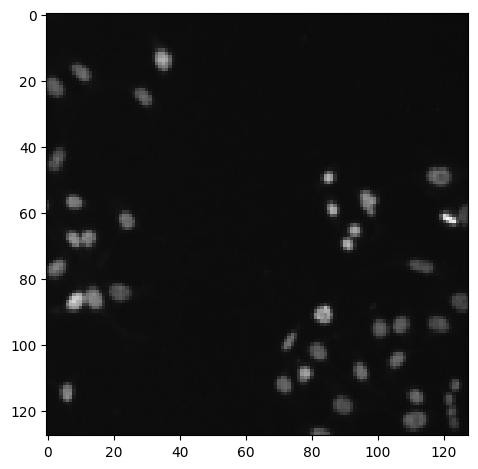

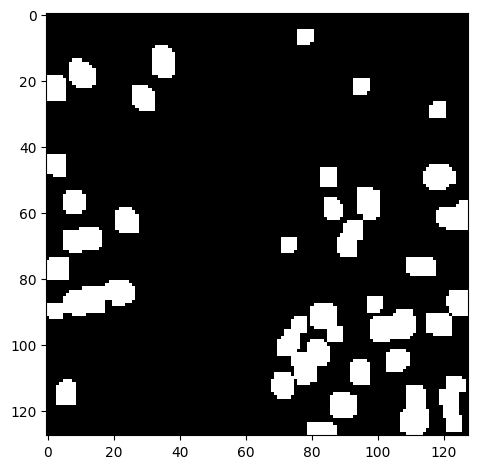

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


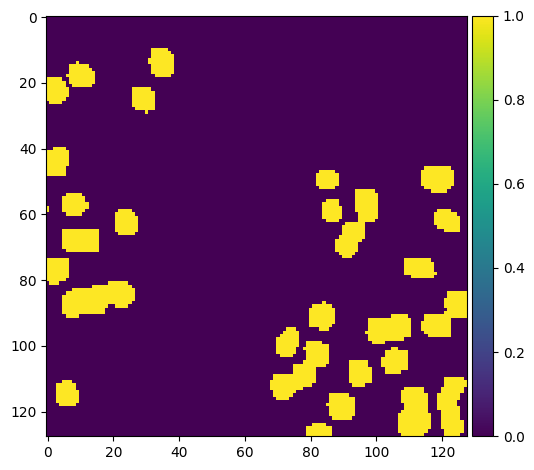

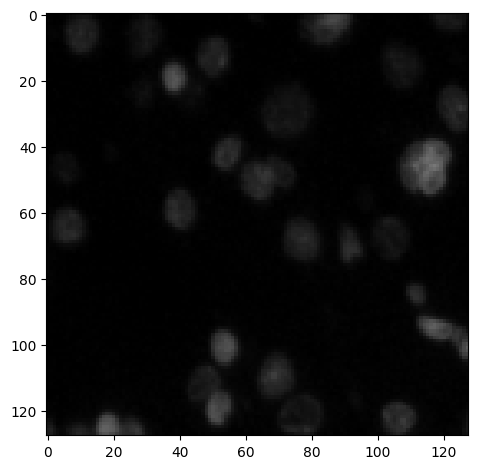

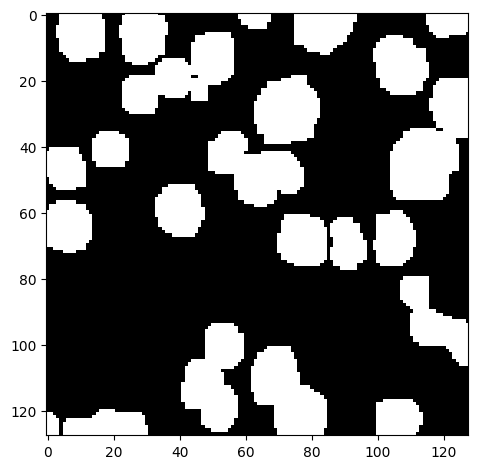

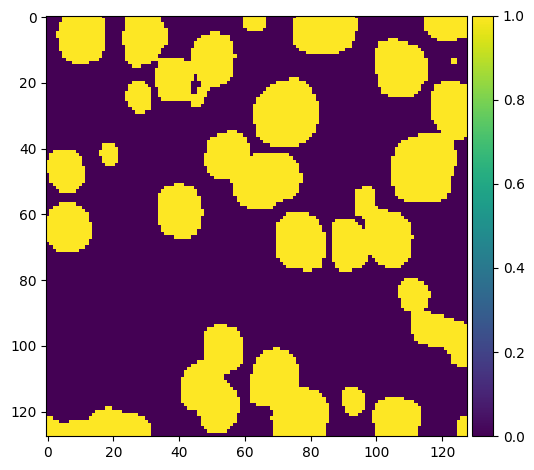

In [3]:
#Building the model
inputs = tf.keras.layers.Input((img_height,img_width,img_channels))

#the layers function only takes in floating point values so if we provide integer values for dimensions, it can throw an error at some point
# so we notmalize it by dividing the pixel values with 255

s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

#contraction layers
#the initializer initializes the weights in a normal distribution, "he_normal" is a truncated normal distribution centered around 0
#16 is the number of features
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(c5)

#expansion layers

u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1])
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer = 'he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs = [inputs], outputs = [outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

#fitting

#callbacks -> modelCheckpoint saves the model after every epoch (save_best/weights_only is also available in modelCheckpoint)
#another callback is earlyStopping, we can "monitor"
#tensorboard callback is a visualisation tool

checkpointer = tf.keras.callbacks.ModelCheckpoint('model_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)


#Let's check how the model performs on images from train, validation, and test

idx = random.randint(0, len(X_train))

preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

#perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

#perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()